In [91]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib.colors as colors
from scipy.io import loadmat

In [92]:
PATH = '/home/straydog/Documents/senior_design/netCDF_files/20191016/'

In [93]:
filearr = [f for f in listdir(PATH) if isfile(join(PATH, f))]
filearr

['cfrad.20191016_193104.520_to_20191016_193115.645_col-radar_DRONE_RHI_RHI.nc',
 'cfrad.20191016_173210.480_to_20191016_173214.480_col-radar_DRONE_FIX_SUR.nc',
 'cfrad.20191016_171409.440_to_20191016_171436.295_col-radar_SPHERE_SECTO_PPI.nc',
 'cfrad.20191016_162711.964_to_20191016_162738.980_col-radar_SPHERE_SECTO_PPI.nc',
 'cfrad.20191016_164316.806_to_20191016_164336.031_col-radar_DRONE_RHI_RHI.nc',
 'cfrad.20191016_183122.269_to_20191016_183127.269_col-radar_DRONE_FIX_SUR.nc',
 'cfrad.20191016_201305.573_to_20191016_201310.573_col-radar_DRONE_FIX_SUR.nc',
 'cfrad.20191016_164933.502_to_20191016_165000.603_col-radar_DRONE_SECTOR_PPI.nc',
 'cfrad.20191016_200905.657_to_20191016_200910.657_col-radar_DRONE_FIX_SUR.nc',
 'cfrad.20191016_162610.399_to_20191016_162637.187_col-radar_SPHERE_SECTO_PPI.nc',
 'cfrad.20191016_175817.402_to_20191016_175853.710_col-radar_DRONE_RHI_RHI.nc',
 'cfrad.20191016_170149.899_to_20191016_170216.891_col-radar_DRONE_SECTOR_PPI.nc',
 'cfrad.20191016_173218.7

In [94]:
cmap_arr = loadmat('/home/straydog/Documents/senior_design/python_scripts/nws.mat')['nwsZ']
clrs = colors.ListedColormap(cmap_arr, 'reflectivity')
fh = Dataset('/home/straydog/Documents/senior_design/netCDF_files/20191016/cfrad.20191016_172209.284_to_20191016_172236.124_col-radar_SPHERE_SECTO_PPI.nc')
fh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Sub_conventions: CF-Radial instrument_parameters radar_parameters radar_calibration
    version: CF-Radial-1.3
    title: ALLPRODS
    institution: 
    references: Conversion software: Radx::SigmetRadxFile
    source: Sigmet IRIS software
    history: Sigmet RAW file: 
    comment: 
    original_format: SIGMETRAW
    driver: RadxConvert(NCAR)
    created: 2019/10/28 21:33:43.213
    start_datetime: 2019-10-16T17:22:09Z
    time_coverage_start: 2019-10-16T17:22:09Z
    start_time: 2019-10-16 17:22:09.284
    end_datetime: 2019-10-16T17:22:36Z
    time_coverage_end: 2019-10-16T17:22:36Z
    end_time: 2019-10-16 17:22:36.124
    instrument_name: col-radar
    site_name: col-radar
    scan_name: SPHERE_SECTO
    scan_id: 0
    platform_is_mobile: false
    n_gates_vary: false
    ray_times_increase: true
    dimensions(sizes): time(246), range(199), sweep(6), string_length_8(8

In [95]:
dim = fh.dimensions
var = fh.variables

In [96]:
#var['azimuth'][:]
#var['measured_transmit_power_h'][:]

In [97]:
matplotlib inline

(0, 12)

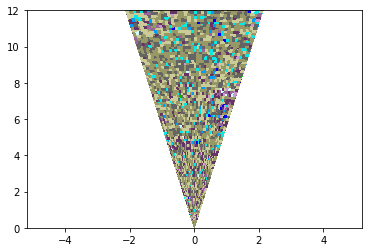

In [98]:
rgate = var['range'][1]-var['range'][0]
ndX = rgate*np.arange(len(var['range']))/1000
ndY = var['azimuth'][:]
ndY = np.reshape(ndY,(len(var['azimuth']),1))*(np.pi/180)
nX = ndX*np.cos(ndY)
nY = ndX*np.sin(ndY)
rflct = var['ZDR']
plt.pcolormesh(nY, nX, rflct, vmin = -20, vmax = 64, cmap = clrs)
plt.ylim(0,12)